# Predicting Heart Disease

Compiled from Flatiron Data Science Module 3 Labs.

We are going to fit a logistic regression model to a dataset concerning heart disease.

## Obtain Data

In [67]:
# Import necessary functions

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, precision_recall_curve

import pandas as pd
import numpy as np

import itertools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
# Import data
df = pd.read_csv('datasets/heartdisease/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Whether or not a patient has heart disease is indicated in the column labeled 'target'. 1 is for positive for heart disease while 0 indicates no heart disease.

In [45]:
# Split the data into target and predictors
y = df['target']
X = df.drop('target', axis = 1)

## Data Preprocessing

In [46]:
# Use MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

## Train Model

### Train-Test Split

In [47]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 17)

### Fit Model

In [48]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept = True, C = 1e12, solver = 'liblinear')

# Fit the model
modlog = logreg.fit(X_train, y_train)

In [49]:
modlog.coef_

array([[-5.36853868e-01, -2.38929326e+00,  2.45603828e+00,
        -2.69593203e+00, -3.01782152e+00,  2.62494309e-03,
         1.05555253e+00,  5.14694723e+00, -1.29756229e+00,
        -4.75395924e+00,  3.09790642e-01, -3.33740015e+00,
        -2.30092519e+00]])

In [50]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

## Model Evaluation

### Basic evaluation

How many times was the classifier correct on the training set?

In [51]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize = True))

0    194
1     33
Name: target, dtype: int64
0    0.854626
1    0.145374
Name: target, dtype: float64


85% accurate

How many times was the classifier correct on the test set?

In [52]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize = True))

0    63
1    13
Name: target, dtype: int64
0    0.828947
1    0.171053
Name: target, dtype: float64


83% accurate

### Confusion Matrix

In [53]:
# Print confusion matrix using sklearn 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[32  9]
 [ 4 31]]


Note sklearn default is to have predictions as the columns and actual observations as the rows
$$
\left[ {\begin{array}{c}
    TN & FP  \\
    FN & TP  \\
    \end{array} } \right]
 $$

Use sklearn's built-in `plot_confusion_matrix`.

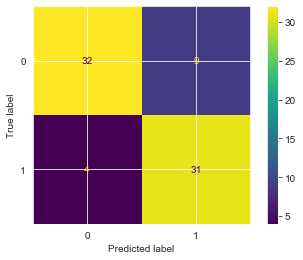

In [54]:
# Plot confusion matrix
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

### Evaluation Metrics

We will compute Precision, Recall, Accuracy and F1 using sklearn metrics.

In [55]:
print("Training")
print(f"Precision: {round(precision_score(y_train, y_hat_train),4)}")
print(f"Recall: {round(recall_score(y_train, y_hat_train),4)}")
print(f"Accuracy: {round(accuracy_score(y_train, y_hat_train),4)}")
print(f"F1 Score: {round(f1_score(y_train, y_hat_train),4)}")
print("---------------")
print("Test")
print(f"Precision: {round(precision_score(y_test, y_hat_test),4)}")
print(f"Recall: {round(recall_score(y_test, y_hat_test),4)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_hat_test),4)}")
print(f"F1 Score: {round(f1_score(y_test, y_hat_test),4)}")

Training
Precision: 0.8392
Recall: 0.9231
Accuracy: 0.8546
F1 Score: 0.8791
---------------
Test
Precision: 0.775
Recall: 0.8857
Accuracy: 0.8289
F1 Score: 0.8267


In [56]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        97
           1       0.84      0.92      0.88       130

    accuracy                           0.85       227
   macro avg       0.86      0.84      0.85       227
weighted avg       0.86      0.85      0.85       227



### ROC curve and AUC

In [80]:
# Calculate the probability scores of each point in the training set
y_train_score = logreg.fit(X_train, y_train).decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.9325931800158604


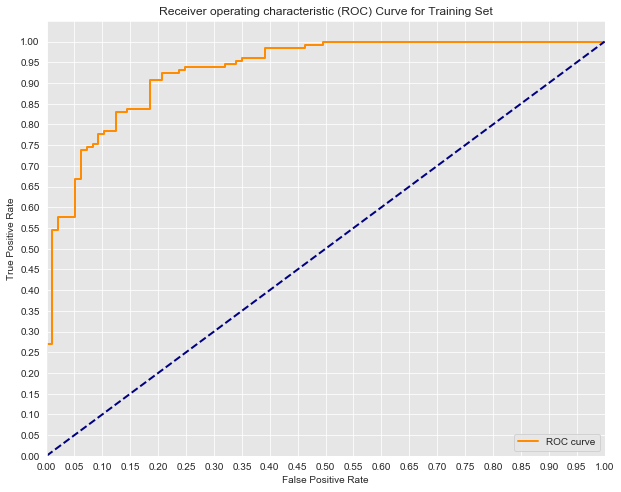

In [58]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

AUC: 0.8989547038327527


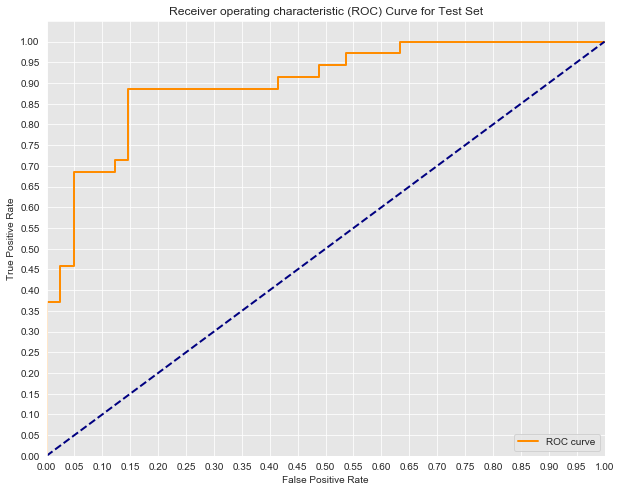

In [59]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

Train AUC: 0.9325931800158604
AUC: 0.8989547038327527


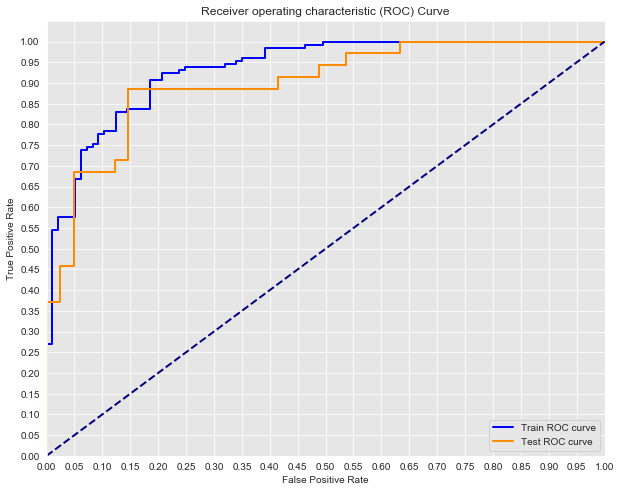

In [60]:
# Both Train and Test on same plot

# Train AUC
print('Train AUC: {}'.format( auc(train_fpr, train_tpr) ))
print('AUC: {}'.format(auc(fpr, tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Comment**: Would want high TPR (ie Recall) as don't want to miss any cases. 
Out of true observations, we want our model to predict almost all, ie TPR close to 1.
For TPR = 0.99 out of 100 cases with heart disease our model will predict 99 and miss 1. 
Having higher FPR is inconvenient but better to scare healthy patients than miss sick patients.

### Model Tuning - regularization

Let's vary the `C` parameter i.e. the amount of regularization.

C value: 1.0 Test AUC: 0.9094076655052264
C value: 1.0 Train AUC: 0.9221252973830293
Difference in AUC: 0.013


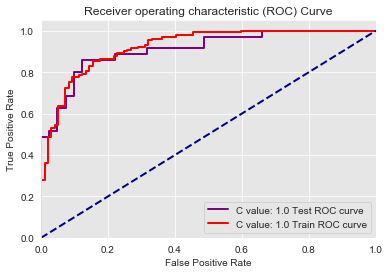

C value: 5.75 Test AUC: 0.9052264808362369
C value: 5.75 Train AUC: 0.9302141157811261
Difference in AUC: 0.025


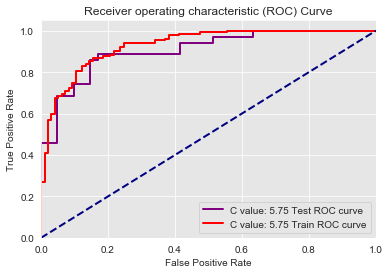

C value: 10.5 Test AUC: 0.9052264808362369
C value: 10.5 Train AUC: 0.9318001586042823
Difference in AUC: 0.027


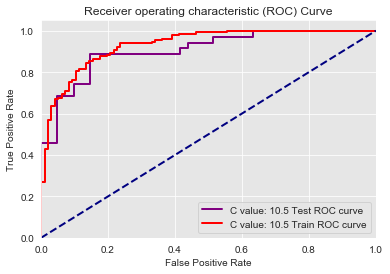

C value: 15.25 Test AUC: 0.9031358885017422
C value: 15.25 Train AUC: 0.9316415543219667
Difference in AUC: 0.029


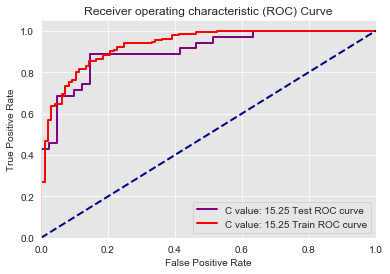

C value: 20.0 Test AUC: 0.9017421602787457
C value: 20.0 Train AUC: 0.9318001586042823
Difference in AUC: 0.03


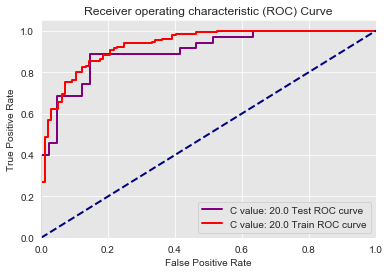

In [61]:
cparam = np.linspace(1,20,5)

for c in cparam:
    logregc = LogisticRegression(fit_intercept = True, C = c, solver = 'liblinear')
    model_logregc = logregc.fit(X_train, y_train)
    y_test_score = logregc.decision_function(X_test)
    y_train_score = logregc.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

    print(f'C value: {c} Test AUC: {auc(test_fpr, test_tpr)}')
    print(f'C value: {c} Train AUC: {auc(train_fpr, train_tpr)}')
    difference = auc(train_fpr, train_tpr) - auc(test_fpr, test_tpr)
    print(f'Difference in AUC: {round(difference,3)}')
    
    plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label=f'C value: {c} Test ROC curve')
    plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label=f'C value: {c} Train ROC curve')


    # Formatting
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

### Model Tuning - recall

Recall our confusion matrix, classification report and ROC curve.

In [62]:
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[32  9]
 [ 4 31]]


In [63]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        97
           1       0.84      0.92      0.88       130

    accuracy                           0.85       227
   macro avg       0.86      0.84      0.85       227
weighted avg       0.86      0.85      0.85       227



Train AUC: 0.9318001586042823
AUC: 0.8989547038327527


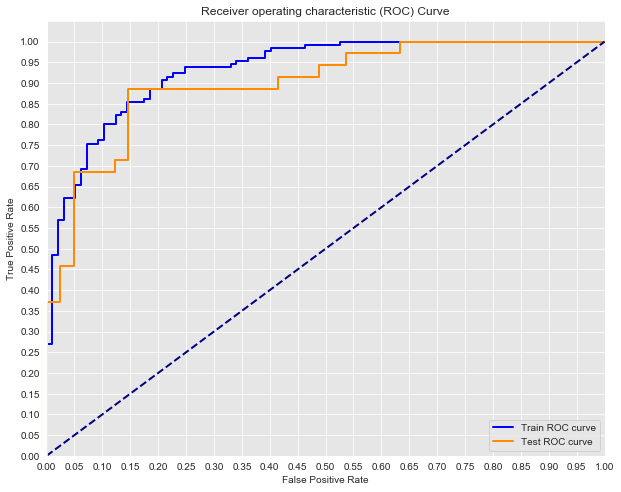

In [64]:
# Train AUC
print('Train AUC: {}'.format( auc(train_fpr, train_tpr) ))
print('AUC: {}'.format(auc(fpr, tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In this case, we want a high recall as False Negatives are very dangerous (i.e. classiying someone as not having heart disease when in fact they do).

In [86]:
y_scores = logreg.fit(X_train, y_train).predict_proba(X_test)

In [94]:
y_scores[:4]

array([[0.04608138, 0.95391862],
       [0.96715309, 0.03284691],
       [0.95065074, 0.04934926],
       [0.88359   , 0.11641   ]])

In [97]:
y_scores[:4,1]

array([0.95391862, 0.03284691, 0.04934926, 0.11641   ])

In [98]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores[:,1]]

In [114]:
t = np.arange(0,0.5, 0.01)
recalls = []
for threshold in t:
    y_adj_pred = adjusted_classes(y_scores, threshold)
    recall_adj = recall(y_test, y_adj_pred)
    recalls.append(recall_adj)

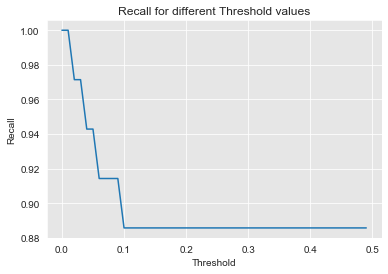

In [118]:
plt.plot(t, recalls)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall for different Threshold values')
plt.show()

## Using own functions

Here we perform the same analysis using own defined functions as much as possible instead of sklearn.

In [20]:
# Import data
df = pd.read_csv('datasets/heartdisease/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Whether or not a patient has heart disease is indicated in the column labeled 'target'. 1 is for positive for heart disease while 0 indicates no heart disease.

In [21]:
# Split the data into target and predictors
y = df['target']
X = df.drop('target', axis = 1)

In [22]:
# Normalize Data
X = X.apply( lambda x: (x - x.min())/(x.max() - x.min()), axis = 0)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 17)

In [24]:
def predict_y(X, w): 
    y = X.dot(w)
    return y

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [26]:
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    # Return finalized weights
    return weights, weights_col

In [27]:
weights, weight_col = grad_desc(X, y, 10000, 0.001)
weights

array([ 0.7802778 , -1.601665  ,  2.61772008, -1.95194946, -1.39350985,
        0.05818755,  1.15984037,  4.36925075, -0.83136019, -2.75080939,
        1.45778904, -3.10796257, -2.19158082])

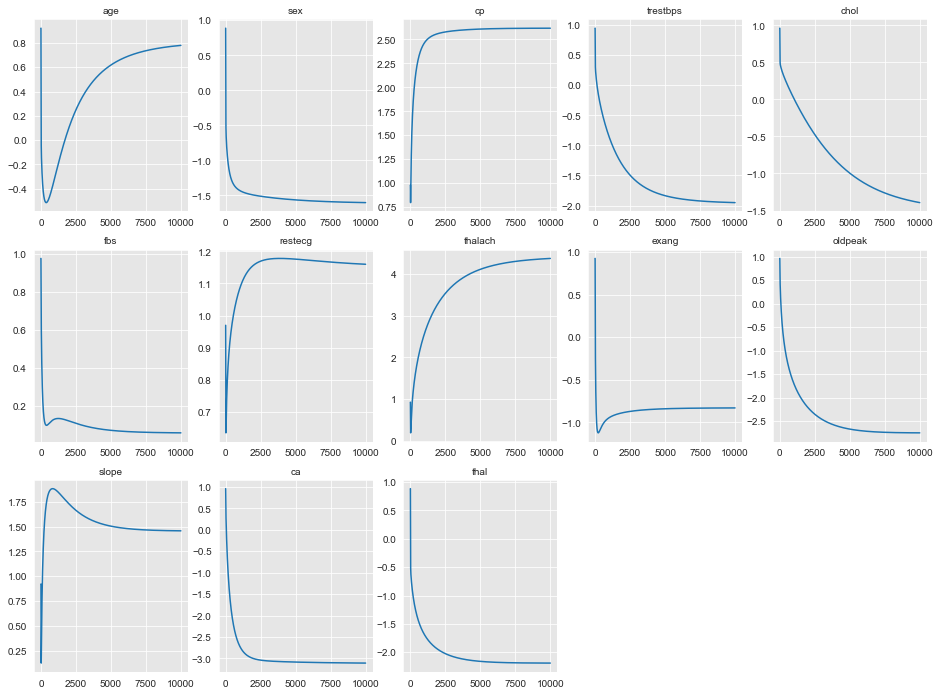

In [28]:
weight_col.columns = np.arange(len(weight_col.columns))

plt.figure(figsize=(16, 12))

for (i, j) in enumerate(weights):
    plt.subplot(3, 5, i + 1)
    plt.title(list(X)[i], size='medium')
    plt.plot(weight_col.iloc[i].T)
    plt.axis('tight')


In [29]:
# Predict probabilities

y_hat_test = sigmoid(np.dot(X_test, weights))
y_hat_train = sigmoid(np.dot(X_train, weights))

In [30]:
# Predict classes
y_test_predictions = [1 if value >= 0.5 else 0 for value in y_hat_test]
y_train_predictions = [1 if value >= 0.5 else 0 for value in y_hat_train]

In [31]:
def conf_matrix(y_true, y_pred):
    
    # Create dictionary with keys
    conf_matrix = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for index, observation in enumerate(y_true):
        # Look at cases where prediction matched actual
        if observation == y_pred[index]:
            if observation == 1:
                conf_matrix['TP'] += 1
            else:
                conf_matrix['TN'] += 1
        # cases where prediction didn't match actual
        else:
            if observation == 1: # so prediction = 0, ie False Negative
                conf_matrix['FN'] += 1
            else:
                conf_matrix['FP'] += 1 # where obervation = 0 and prediction = 1, i.e. False Positive

    return conf_matrix

In [32]:
conf_matrix(y_test, y_test_predictions)

{'TP': 31, 'TN': 33, 'FP': 8, 'FN': 4}

In [33]:
cnf_matrix = confusion_matrix(y_test, y_test_predictions)
cnf_matrix

array([[33,  8],
       [ 4, 31]])

Let's define a function to make a nice visualisation of the Confusion Matrix.

In [34]:
def plot_conf_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize == True:
        cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
    
    #print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show()

Plot the confusion matrix using our function.

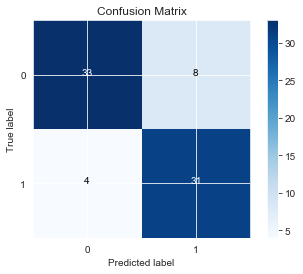

In [35]:
# Plot confusion matrix
plot_conf_matrix(cnf_matrix, set(y),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

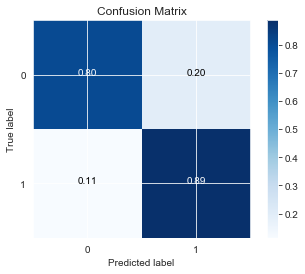

In [36]:
# Plot normalized confusion matrix
plot_conf_matrix(cnf_matrix, set(y),
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [37]:
def precision(y, y_hat):
    y_and_y_hat = list(zip(y, y_hat))
    TP = 0
    FP = 0
    for pair in y_and_y_hat:
        if (pair[0] == 1) & (pair[1] == 1):
            TP += 1
        if (pair[0] == 0) & (pair[1] == 1):
            FP += 1
    return TP/(TP+FP)

In [107]:
def recall(y, y_hat):
    y_and_y_hat = list(zip(y, y_hat))
    TP = 0
    FN = 0
    for pair in y_and_y_hat:
        if (pair[0] == 1) & (pair[1] == 1):
            TP += 1
        if (pair[0] == 1) & (pair[1] == 0):
            FN += 1
    return TP/(TP+FN)

In [39]:
def accuracy(y, y_hat):
    y_and_y_hat = list(zip(y, y_hat))
    TP_or_TN = 0
    for pair in y_and_y_hat:
        if pair[0] == pair[1]:
            TP_or_TN += 1
    return TP_or_TN/len(y)

In [40]:
def f1_score(y, y_hat):
    return 2*(precision(y,y_hat)*recall(y,y_hat))/(precision(y,y_hat) + recall(y,y_hat))

In [41]:
print("Training")
print(f"Precision: {round(precision(y_train, y_train_predictions),4)}")
print(f"Recall: {round(recall(y_train, y_train_predictions),4)}")
print(f"Accuracy: {round(accuracy(y_train, y_train_predictions),4)}")
print(f"F1 Score: {round(f1_score(y_train, y_train_predictions),4)}")
print("---------------")
print("Test")
print(f"Precision: {round(precision(y_test, y_test_predictions),4)}")
print(f"Recall: {round(recall(y_test, y_test_predictions),4)}")
print(f"Accuracy: {round(accuracy(y_test, y_test_predictions),4)}")
print(f"F1 Score: {round(f1_score(y_test, y_test_predictions),4)}")

Training
Precision: 0.8403
Recall: 0.9308
Accuracy: 0.859
F1 Score: 0.8832
---------------
Test
Precision: 0.7949
Recall: 0.8857
Accuracy: 0.8421
F1 Score: 0.8378


Train AUC: 0.9242664551942903
AUC: 0.9191637630662021


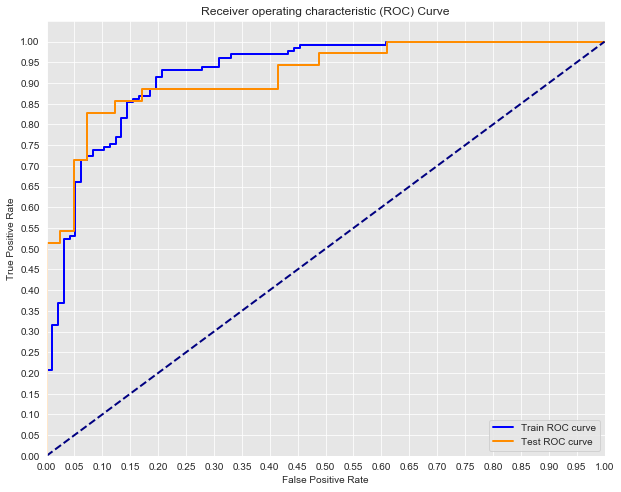

In [42]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)

# Train AUC
print('Train AUC: {}'.format( auc(train_fpr, train_tpr) ))
print('AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()